# Section 1
## Trouver une solution brute-force

- action : part de l'entreprise
- coût : prix d'achat de l'action
- bénéfice : gain réalisé à la revente de l'action après 2 ans

 3 contraintes :
 1. L'action ne peut être acheté qu'une fois.
 2. Il ne peut être acheté de fraction d'action.
 3. 500 euros maximum peuvent être investis.

 Solution Brute-force : 
   - Générer toutes les combinaisons possibles d'actions.
   - Filtrer celles qui respectent la contrainte de budget.
   - Calculer le bénéfice pour chaque combinaison valide.
   - Sélectionner la combinaison avec le bénéfice maximum.


In [ ]:
# Libraries necessary for data visualization and manipulation installations
%pip install matplotlib seaborn pandas
%pip install tabulate
%matplotlib widget


In [ ]:
"""Version 1 (Brute Force)"""

import csv
from itertools import combinations

def parse_benefit(coast, benefit_str):
    """Convertit le bénéfice en pourcentage vers une valeur absolue"""
    if isinstance(benefit_str, str) and benefit_str.endswith('%'):
        percentage = float(benefit_str.rstrip('%'))
        return (coast * percentage) / 100
    return float(benefit_str)

def read_actions_from_csv(file):
    """Lit les actions depuis un fichier CSV avec gestion des pourcentages"""
    actions = []
    with open(file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            coast = float(row['Coast'])
            benefit = parse_benefit(coast, row['Benefit'])
            actions.append({
                'name': row['Actions'],
                'coast': coast,
                'benefit': benefit
            })
    return actions

def find_best_combination(actions, max_budget=500):
    """Trouve la meilleure combinaison d'actions respectant le budget maximum"""
    best_combination = None
    max_benefit = 0
    n = len(actions)
    
    # Générer et évaluer toutes les combinaisons possibles
    for r in range(n + 1):
        for combo in combinations(actions, r):
            total_coast = sum(action['coast'] for action in combo)
            
            # Vérifier si la combinaison respecte le budget
            if total_coast <= max_budget:
                total_benefit = sum(action['benefit'] for action in combo)
                
                # Mettre à jour si c'est la meilleure combinaison
                if total_benefit > max_benefit:
                    max_benefit = total_benefit
                    best_combination = {
                        'actions': combo,
                        'total_coast': total_coast,
                        'total_benefit': total_benefit
                    }
    
    return best_combination

# Lecture des actions et recherche de la meilleure combinaison
actions = read_actions_from_csv('data/Actions.csv')
best = find_best_combination(actions)

# Affichage du résultat
if best:
    print(f"Best combination:")
    print(f"Total cost: {best['total_coast']:.2f} euros")
    print(f"Total benefit: {best['total_benefit']:.2f} euros")
    print(f"Selected actions:")
    for action in best['actions']:
        print(f"  - {action['name']}: {action['coast']:.2f}€ (benefit: {action['benefit']:.2f}€)")


# Section 2
## Optimiser l'agorithme

### Livrables : 
- programme Python optimisé
- présentation PPT avec :
    - analyse algo force brute
    - diagramme/organigramme/pseudocode décrivant la solution optimisé
    - algorithme de la version optimisé et cas limites
    - comparaison des performances en utilisant la notation Big-O, la complexité temporelle et l'analyse de la mémoire


## Bénéfice (prix unitaire x profit en %) par rapport au prix d'achat de l'action

**! ATTENTION!** les fichiers datasets comportent plusieurs problèmes : 
- des NaN possibles
- des valeurs == 0.00
- des valeurs de "price" négatives
  
==> mise en place de filtres **droptna: NaN ; 'price'&'profit'>0 : pour neg & 0.00**


# Nettoyage & affichage dataset 1 :

1. Le premier script ouvre en r/w le fichier brut sélectionné.
2. Supprime toute les lignes dont les colonnes *price* ou *profit* contiennent un *NaN*, *0.00* ou un *float négatif*.
3. Calcule le bénéfice à deux ans, *benefit_2y* . 
4. L'inscrit dans la colonne du même nom dans un nouveau fichier de sortie : dataset_1_cured.csv

In [13]:
"""Nettoyage dataset_1 --> dataset_1_cured.csv"""
import pandas as pd

df = pd.read_csv("data/dataset_1.csv")

#Supprime toutes les lignes avec des valeurs nulles en prix et profit car ça n'aurait pas de sens de calculer
df = df.dropna(subset=['price', 'profit']) 
df = df[(df['price'] > 0) & (df['profit'] > 0)]

df['benefit_2y'] = df['price'] * df['profit']

df.sort_values("benefit_2y", ascending=False)
df.to_csv('data/dataset_1_cured.csv') # Sauvegarde de la version nettoyée & amendé de la colonne 'benefit_2y'

df

,name,price,profit,benefit_2y
0,Share-DUPH,10.01,12.25,122.6225
1,Share-GTAN,26.04,38.06,991.0824
2,Share-USUF,9.25,27.69,256.1325
3,Share-CFOZ,10.64,38.21,406.5544
4,Share-QLRX,15.72,27.47,431.8284
...,...,...,...,...
996,Share-JPLO,9.81,30.98,303.9138
997,Share-PRLI,21.38,35.35,755.7830
998,Share-PCSR,28.48,0.93,26.4864
999,Share-ISXU,23.73,15.06,357.3738


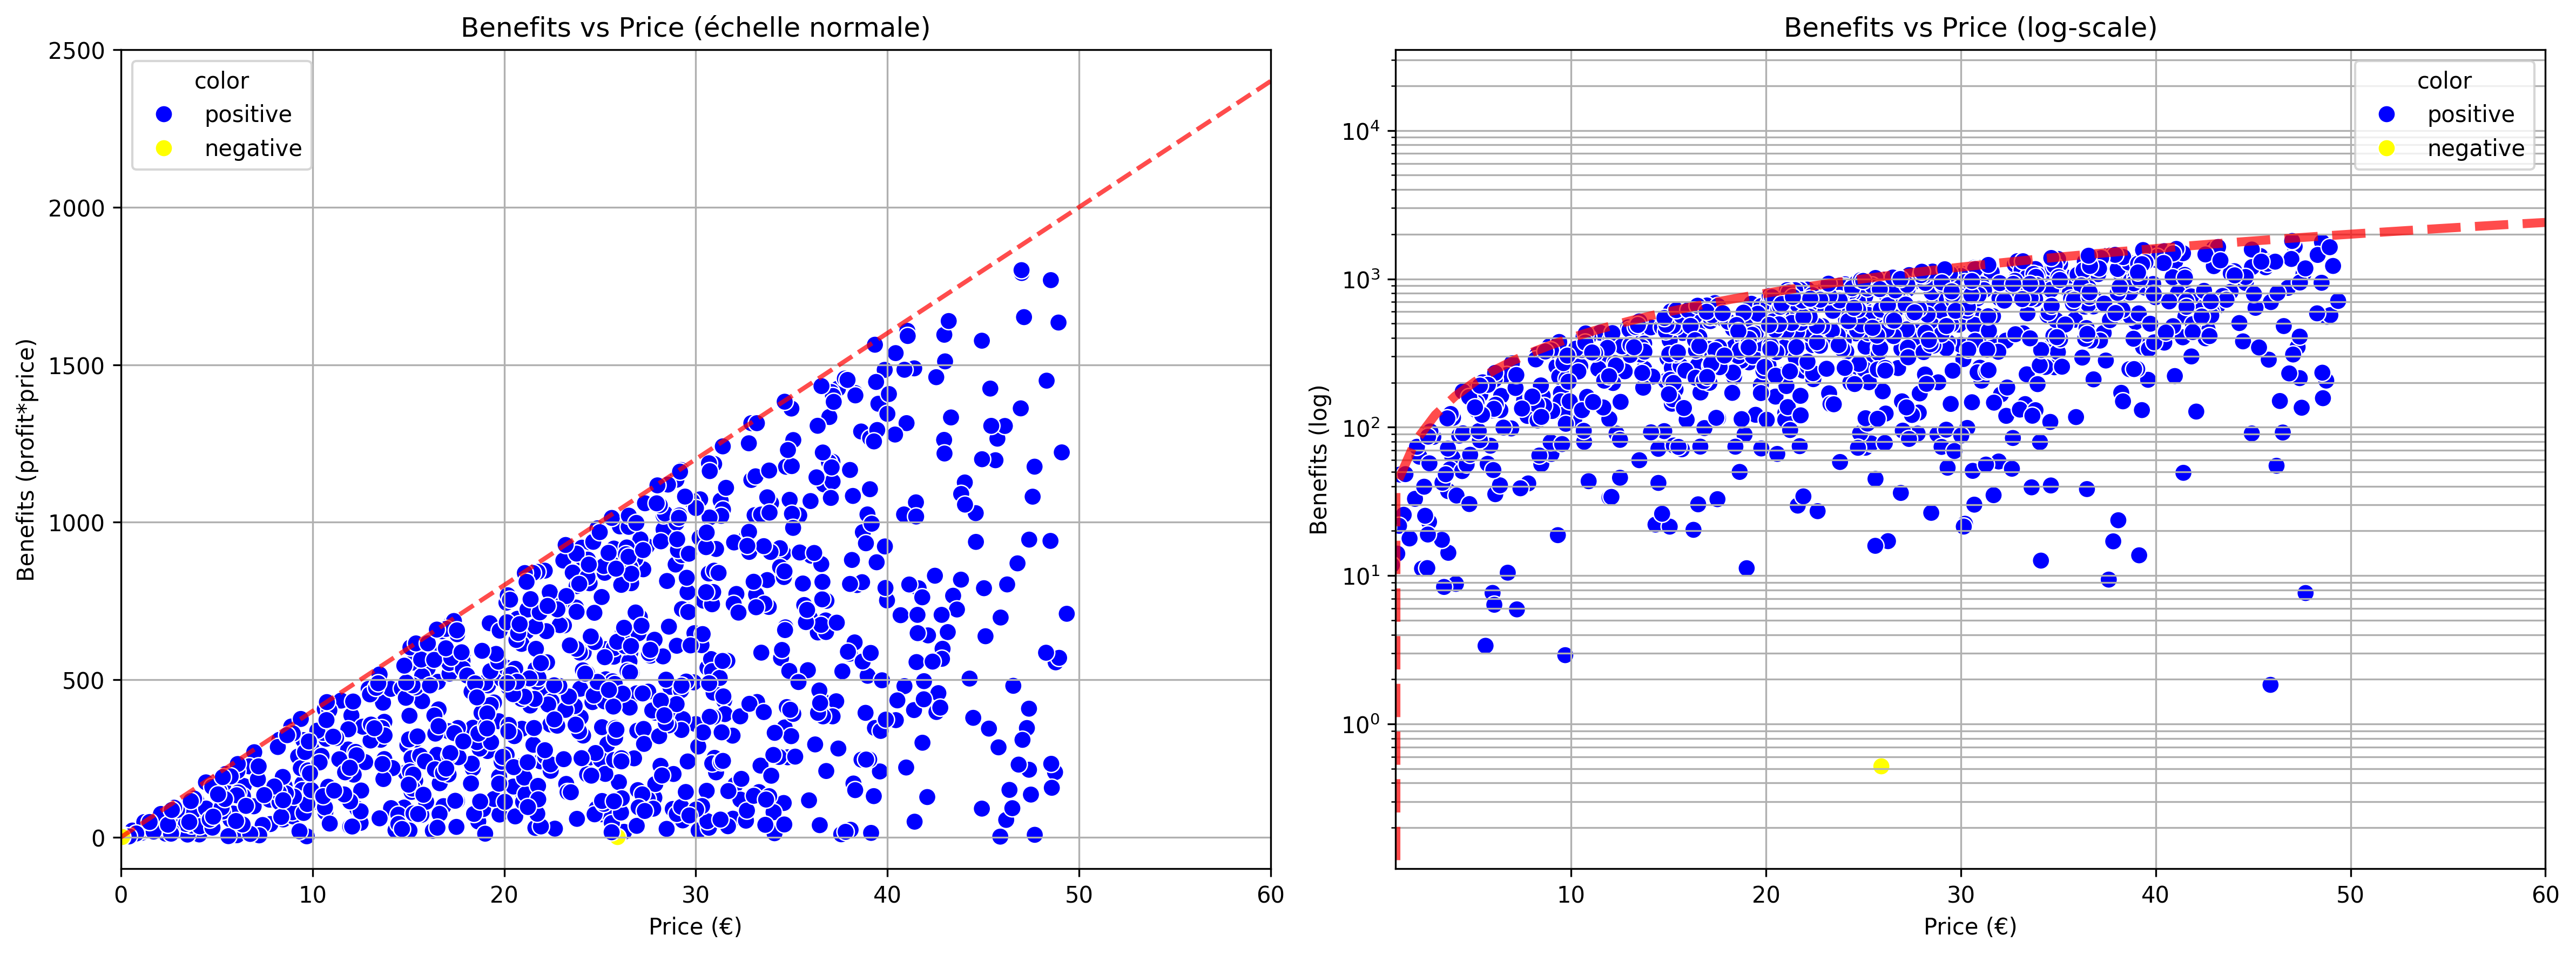

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/dataset_1_cured.csv')

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['benefit_2y'].apply(lambda v: 'negative' if v < 1 else 'positive')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'yellow', 'positive': 'blue'},
    s=60,
    marker='o'
)

# AJOUTER ICI LA FONCTION QUI SERT DE REFÉRENCE
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 40*x_values, 'r--', linewidth=2, label='y = x', alpha=0.7)


plt.title("Benefits vs Price (échelle normale)")
plt.xlabel("Price (€)")
plt.ylabel("Benefits (profit*price)")
plt.xlim(0, 60)
plt.ylim(-100, 2500)
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'yellow', 'positive': 'blue'},
    s=60,
    marker='o'
)

# AJOUTER ICI LA FONCTION QUI SERT DE REFÉRENCE
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 40*x_values, 'r--', linewidth=4, label='y = x', alpha=0.7)

plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Benefits vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.ylabel("Benefits (log)")
plt.xlim(1, 60)
plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


# Nettoyage & affichage dataset 2 :

1. Le premier script ouvre en r/w le fichier brut sélectionné.
2. Supprime toute les lignes dont les colonnes *price* ou *profit* contiennent un *NaN*, *0.00* ou un *float négatif*.
3. Calcule le bénéfice à deux ans, *benefit_2y* . 
4. L'inscrit dans la colonne du même nom dans un nouveau fichier de sortie : dataset_2_cured.csv

In [8]:
"""Nettoyage dataset_2 --> dataset_2_cured.csv"""
import pandas as pd

df = pd.read_csv("data/dataset_2.csv")

#Supprime toutes les lignes avecdes valeur nulles eb prix et profit car ça n'aurait pas de sens de calculer
df = df.dropna(subset=['price', 'profit']) 
df = df[(df['price'] > 0) & (df['profit'] > 0)]

df['benefit_2y'] = df['price'] * df['profit']

df.sort_values("benefit_2y", ascending=False)
df.to_csv('data/dataset_2_cured.csv')

df

,name,price,profit,benefit_2y
0,Share-MOEX,40.60,16.69,677.6140
1,Share-GBGY,27.08,34.09,923.1572
3,Share-FJTI,33.50,20.81,697.1350
4,Share-LGDP,15.26,3.40,51.8840
5,Share-GEBJ,5.87,37.95,222.7665
...,...,...,...,...
991,Share-JSJH,28.84,34.45,993.5380
992,Share-ICHU,28.94,11.52,333.3888
995,Share-GYES,12.71,25.90,329.1890
997,Share-ECAQ,31.66,39.49,1250.2534


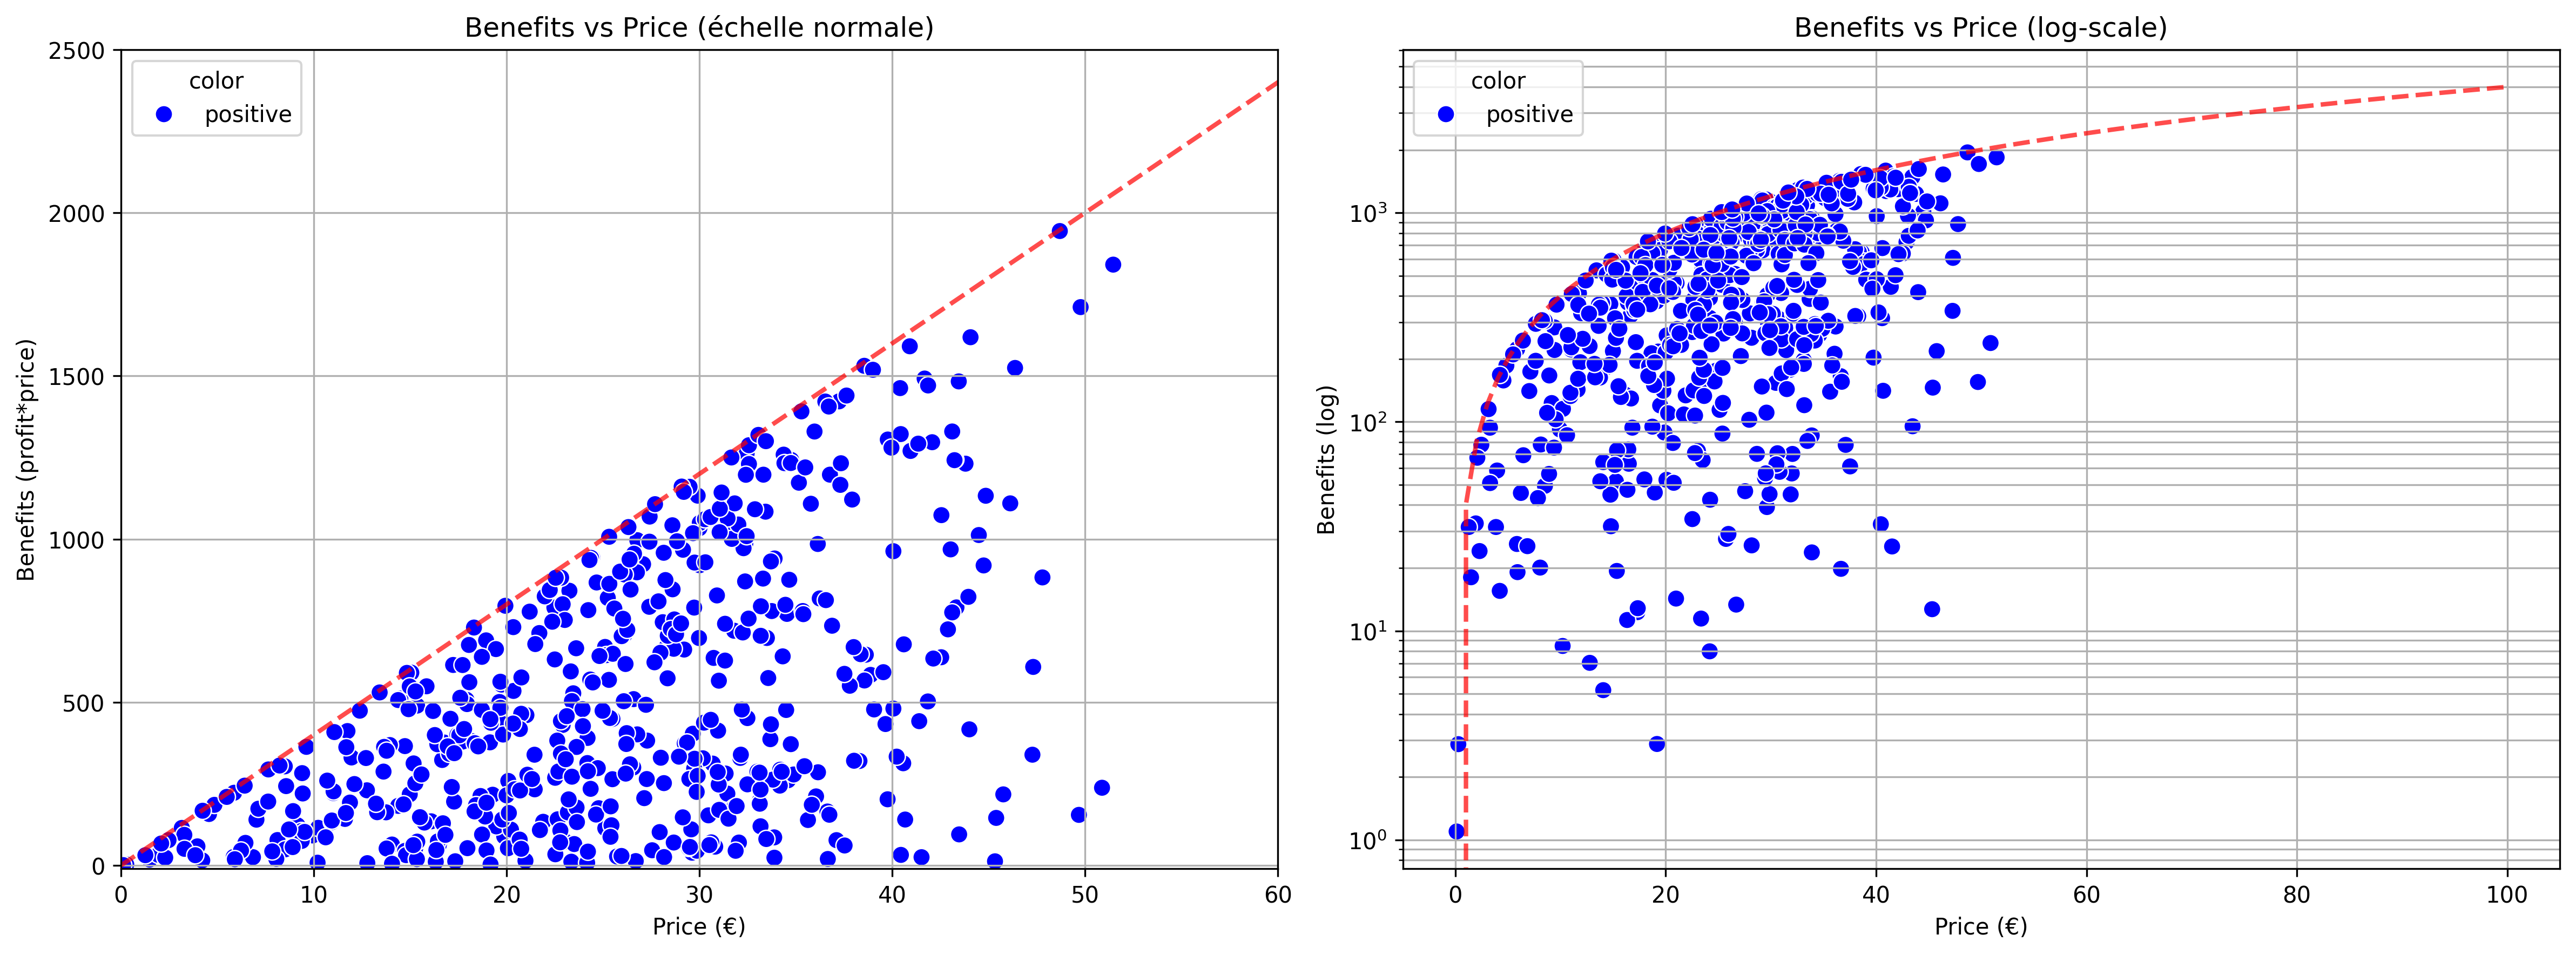

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/dataset_2_cured.csv')

# Coloration selon ton critère (< 1 → rouge, sinon bleu)
df['color'] = df['benefit_2y'].apply(lambda v: 'negative' if v < 1 else 'positive')

# ----------------------------
# Deux graphiques côte à côte
# ----------------------------
plt.figure(figsize=(16, 6), dpi=300)

# -------------------------
# GRAPHIQUE 1 : échelle normale
# -------------------------
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# AJOUTER ICI LA FONCTION QUI SERT DE REFÉRENCE
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 40*x_values, 'r--', linewidth=2, label='y = x', alpha=0.7)

plt.title("Benefits vs Price (échelle normale)")
plt.xlabel("Price (€)")
plt.xlim(0, 60)
plt.ylabel("Benefits (profit*price)")
plt.ylim(-10, 2500)
plt.grid(True)

# -------------------------
# GRAPHIQUE 2 : échelle logarithmique
# -------------------------
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x='price',
    y='benefit_2y',
    hue='color',
    palette={'negative': 'red', 'positive': 'blue'},
    s=60,
    marker='o'
)

# AJOUTER ICI LA FONCTION QUI SERT DE REFÉRENCE
x_values = np.linspace(0, 100, 100)
plt.plot(x_values, 40*x_values, 'r--', linewidth=2, label='y = x', alpha=0.7)

plt.yscale('log')  # <-- Échelle logarithmique
plt.title("Benefits vs Price (log-scale)")
plt.xlabel("Price (€)")
plt.ylabel("Benefits (log)")
plt.grid(True, which='both')

plt.tight_layout()   # évite le chevauchement
plt.show()


# Section 3
## Backtestez et optimisez

Tester le programmer sur deux datasets et comparer les décisions d'achat.